# Required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


# Reading data

In [2]:
df = pd.read_csv(r"C:\Users\JAY\Desktop\iris.csv")

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.shape

(150, 6)

In [6]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# df['Species_class']=np.where(df.Species=='Iris-virginica',1,np.where(df.Species=='Iris-versicolor',2,3))
# df.Species_class.value_counts()

# Finding correlation matrix

In [9]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

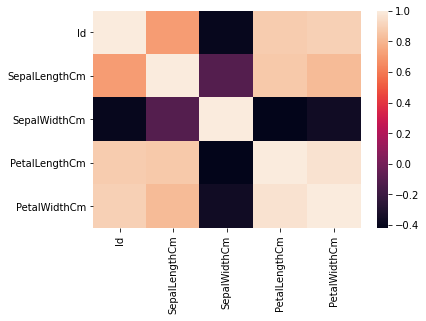

In [10]:
sns.heatmap(df.corr())

In [11]:
target = df['Species']
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
df2 = df.copy()
df2 = df2.drop('Species', axis=1)
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [13]:
X=df.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
Y=df['Species'].values
df.shape

(150, 6)

# Model training

In [14]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training split:",X_train.shape)
print("Testing spllit:",X_test.shape)

Training split: (120, 4)
Testing spllit: (30, 4)


In [15]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [16]:
Y_pred = dtree.predict(X_test)

# Decision tree

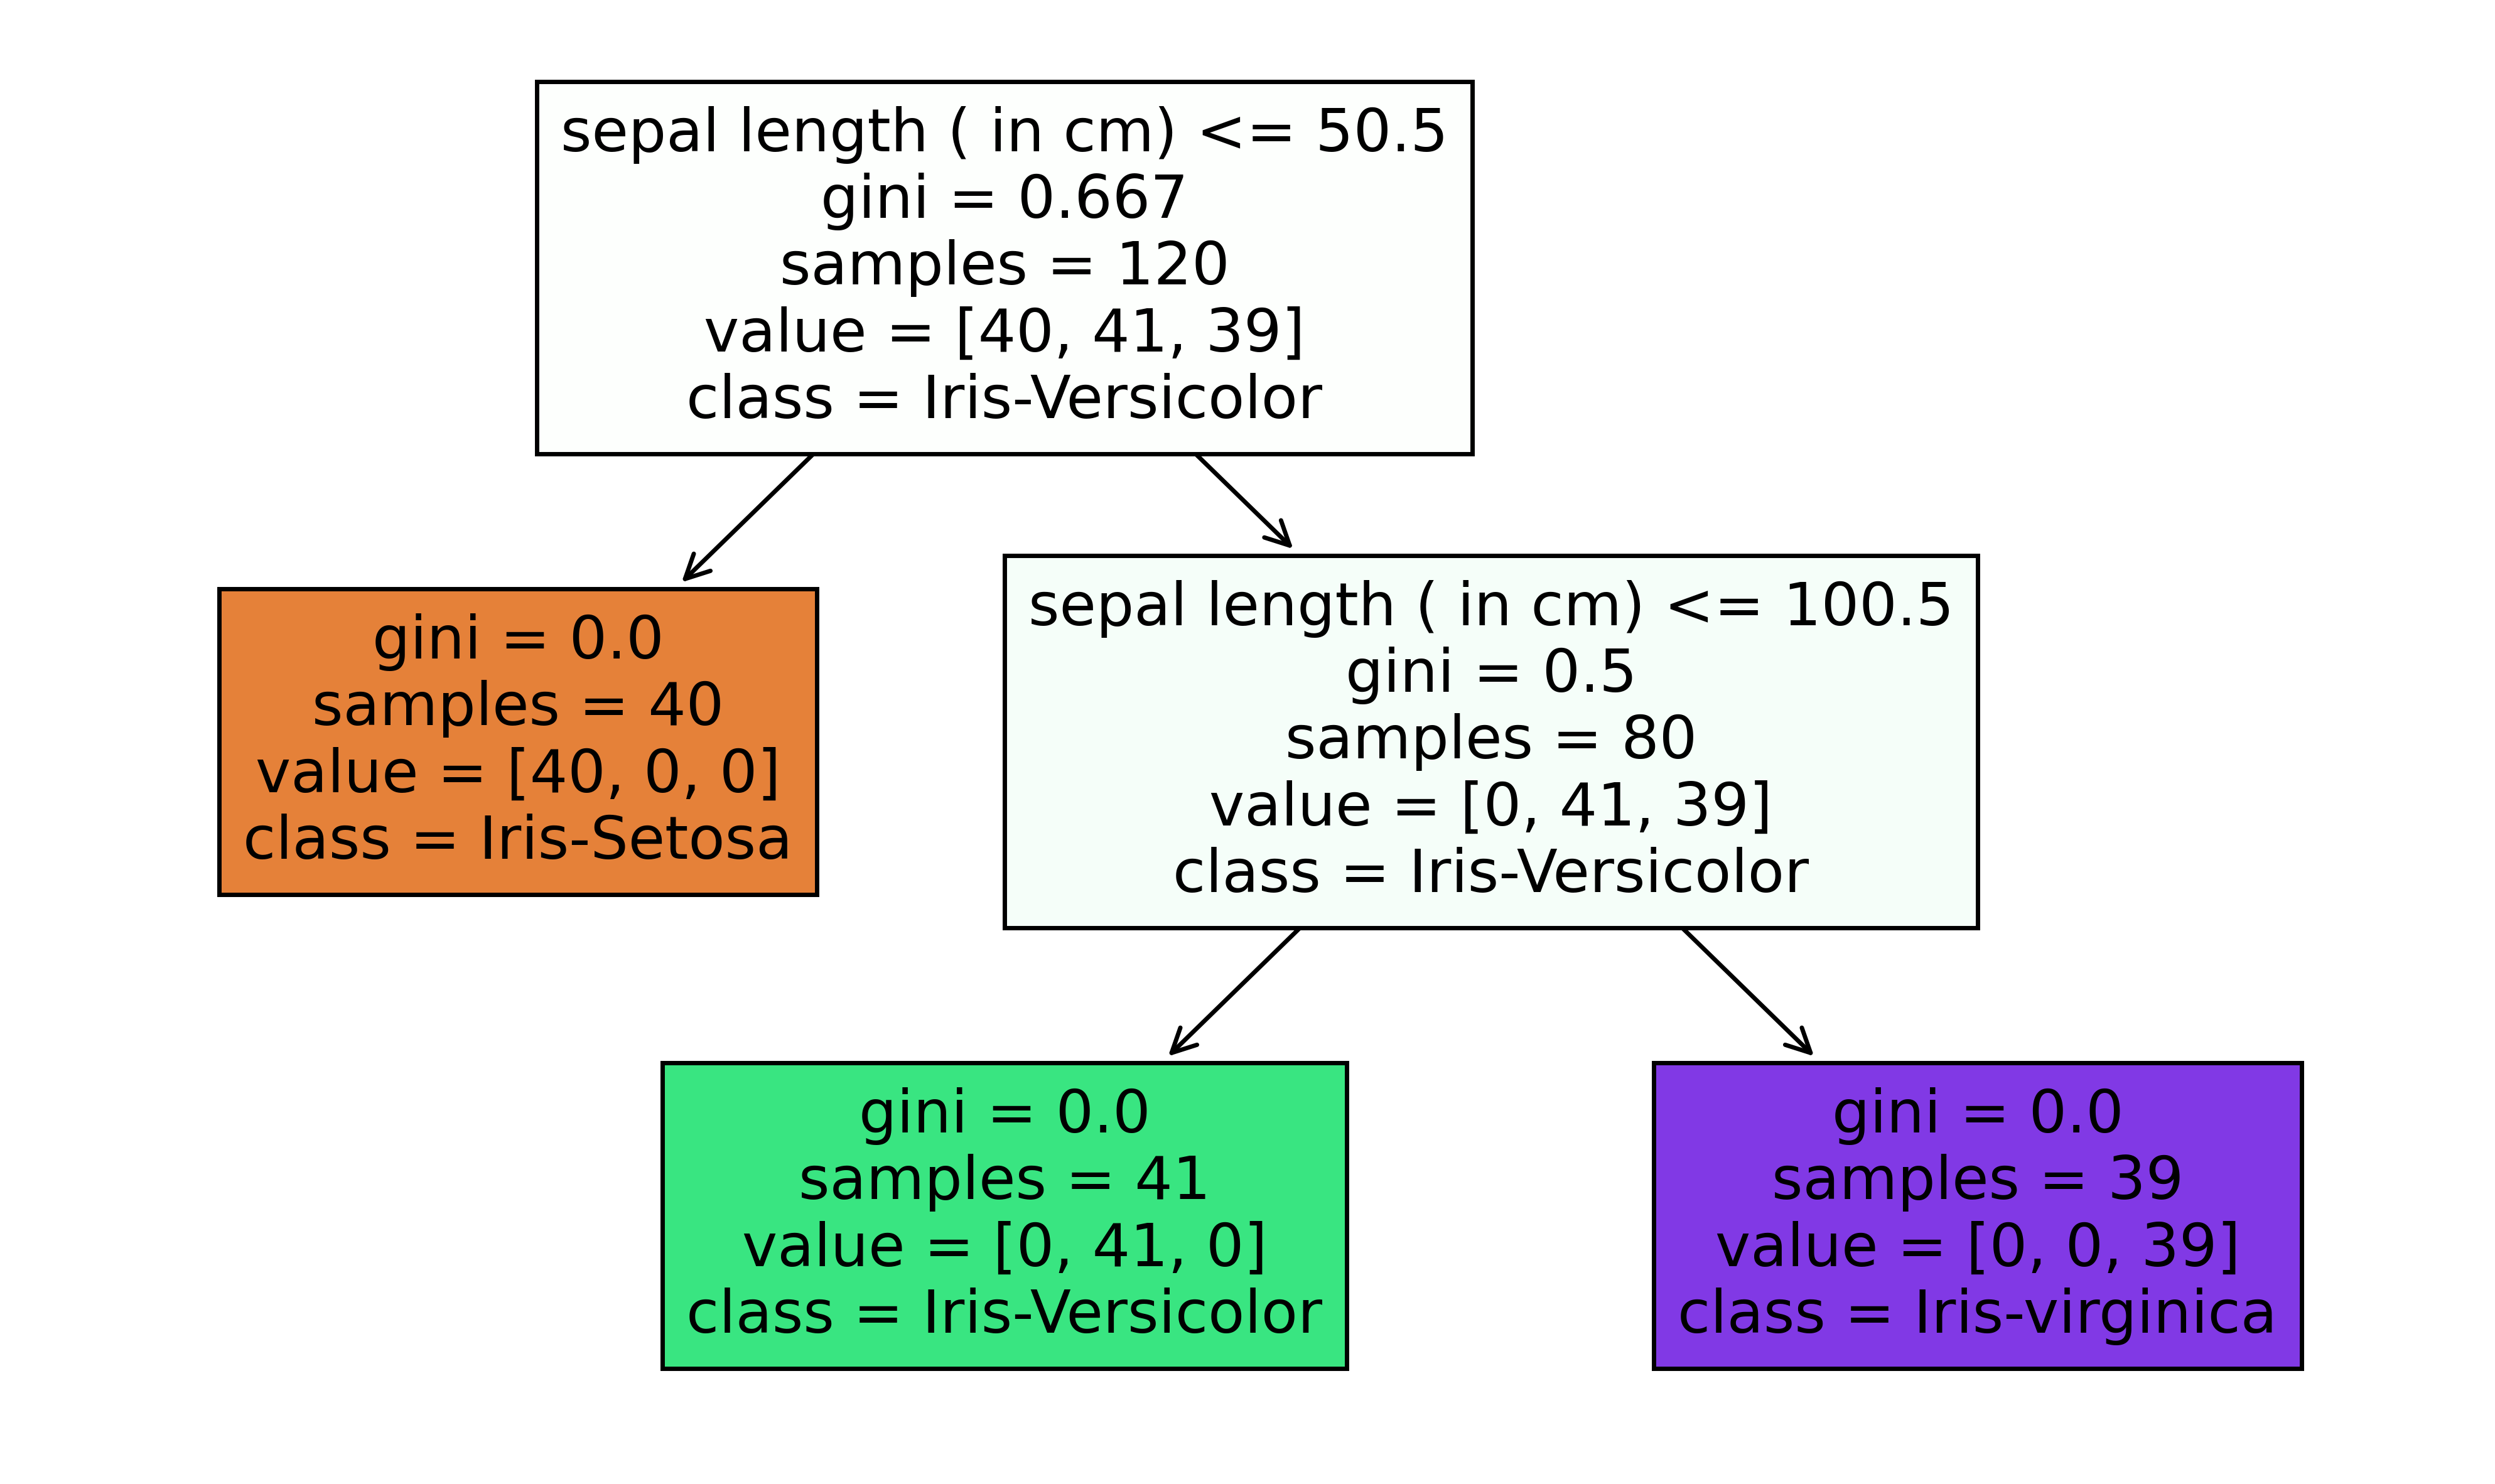

In [17]:
featName=['sepal length ( in cm)','sepal width (in cm)','petal length (in cm)','petal width (in cm)']
clsName=['Iris-Setosa','Iris-Versicolor','Iris-virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6), dpi = 500)

tree.plot_tree(dtree, feature_names = featName, class_names = clsName, filled = True);
fig.savefig('iris.png')